# Round 7 | Ainara Guerra

#### but first: libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value


In [2]:
#Read the .csv file.
df = pd.read_csv('marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
#Deal with NaN values.
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
#Change headers names. 
cols = [col_name.lower().replace(' ', '_') for col_name in df]
df.columns = cols
df = df.rename(columns={'employmentstatus': 'employment_status'})
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
#Split in numericals and categoricals. 
Z = df.copy()
Z_num = Z.select_dtypes(include = np.number)
Z_cat = Z.select_dtypes(include = np.object)

# EDA

    At this point is where I started to do different things from previous labs to improve the model

In [9]:
# Dealing with outliers.

In [10]:
Z_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

<AxesSubplot:xlabel='customer_lifetime_value'>

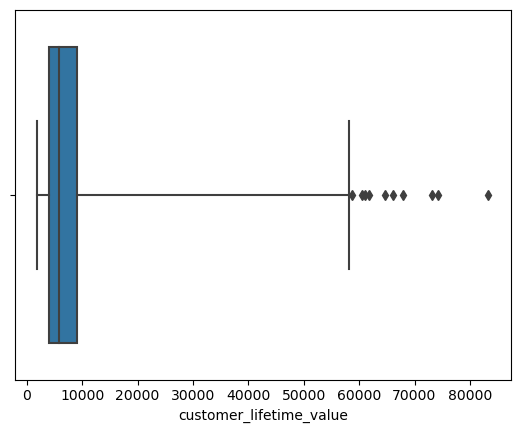

In [11]:
sns.boxplot(x=Z['customer_lifetime_value'],whis=10)
# Even I found outliers, I don't think it's worth it delet it them in this case because of the column category

<AxesSubplot:xlabel='months_since_last_claim'>

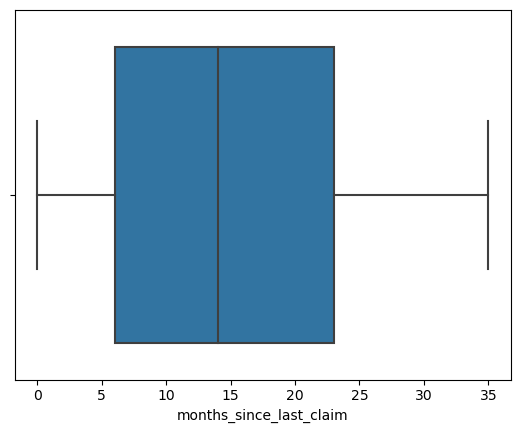

In [12]:
sns.boxplot(x=Z['months_since_last_claim'],whis=10)


<AxesSubplot:xlabel='monthly_premium_auto'>

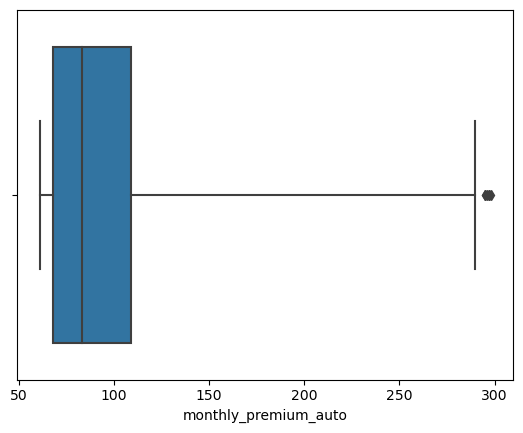

In [13]:
sns.boxplot(x=Z['monthly_premium_auto'],whis=4.5)
#this outliers are very concretated in one point, let's see if removing it improves my model.


In [14]:
iqr = np.percentile(Z['monthly_premium_auto'],75) - np.percentile(Z['monthly_premium_auto'],25)
upper_limit = np.percentile(Z['monthly_premium_auto'],75) + 4.5*iqr
lower_limit = np.percentile(Z['monthly_premium_auto'],25) - 4.5*iqr
Z = Z[(Z['monthly_premium_auto']>lower_limit) & (Z['monthly_premium_auto']<upper_limit)]
Z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9128 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9128 non-null   object 
 1   state                          9128 non-null   object 
 2   customer_lifetime_value        9128 non-null   float64
 3   response                       9128 non-null   object 
 4   coverage                       9128 non-null   object 
 5   education                      9128 non-null   object 
 6   effective_to_date              9128 non-null   object 
 7   employment_status              9128 non-null   object 
 8   gender                         9128 non-null   object 
 9   income                         9128 non-null   int64  
 10  location_code                  9128 non-null   object 
 11  marital_status                 9128 non-null   object 
 12  monthly_premium_auto           9128 non-null   i

<AxesSubplot:xlabel='months_since_policy_inception'>

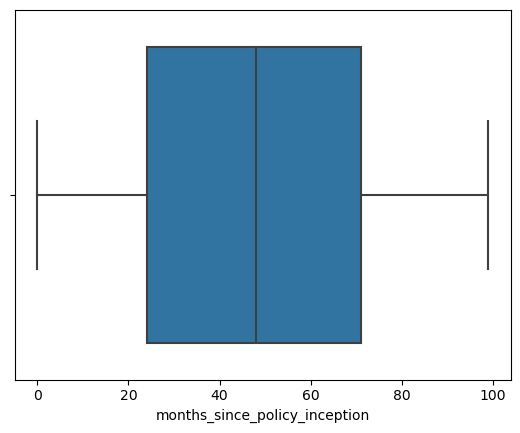

In [15]:
sns.boxplot(x=Z['months_since_policy_inception'],whis=10)

In [16]:
#Split in numericals and categoricals with the clean values because if I remove the outliers from Z_num and not from Z I would have less rows in numericals than categoricals. 
Z1 = Z.copy()
Z1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [17]:
Z_num1 = Z1.select_dtypes(include = np.number)
Z_cat1 = Z1.select_dtypes(include = np.object)

In [18]:
# use the concept of multicollinearity and remove insignificant variables
## In the heatmap I didn't saw any multicollinearity

In [19]:
# Normalization.
transformer = MinMaxScaler().fit(Z_num1)
Z_minmax = transformer.transform(Z_num1)
Z_num_norm = pd.DataFrame(Z_minmax,columns=Z_num1.columns)
Z_num_norm.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.034934,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.144105,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.205240,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.196507,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.052402,0.342857,0.444444,0.0,0.000,0.047710


In [20]:
# Standardization
transformer1 = StandardScaler().fit(Z_num1)
Z_standardized = transformer.transform(Z_num1)
Z_num_stand = pd.DataFrame(Z_standardized, columns=Z_num1.columns)
Z_num_stand.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.034934,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.144105,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.205240,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.196507,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.052402,0.342857,0.444444,0.0,0.000,0.047710


In [21]:
# Encoding Categorical Data.
## In the previous lab I think I encoded too many categoricals, this time I am going to do less so I try to improve the model. 

In [22]:
response_enc = Z1['response']
response_enc_dumm = pd.get_dummies(response_enc, drop_first=False)
response_enc_dumm

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9129,1,0
9130,0,1
9131,1,0
9132,1,0


In [23]:
employment_enc = Z1['employment_status']
employment_enc_dumm = pd.get_dummies(employment_enc, drop_first=False)
employment_enc_dumm

,Disabled,Employed,Medical Leave,Retired,Unemployed
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
9129,0,1,0,0,0
9130,0,1,0,0,0
9131,0,0,0,0,1
9132,0,1,0,0,0


In [24]:
gender_enc = Z1['gender']
gender_enc_dumm = pd.get_dummies(gender_enc, drop_first=False)
gender_enc_dumm

,F,M
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
9129,0,1
9130,1,0
9131,0,1
9132,0,1


In [25]:
Z_encoded = pd.concat ([Z_num1,response_enc_dumm, employment_enc_dumm,gender_enc_dumm], axis=1)
Z_encoded_1 = Z_encoded.drop(['total_claim_amount'], axis=1)


# Modeling


In [26]:
# Splitting into train set and test set. use a different ratio of train test split

In [27]:
X = Z_encoded_1
y = Z_encoded['total_claim_amount']
X_train, X_test, y_train, y_test = train_test_split(Z_encoded, y, test_size=0.2, random_state=42)

In [28]:
# Apply model

In [29]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
predictions  = model.predict(X_test)
predictions

array([1046.4     ,  365.002909,   43.14147 , ..., 1122.658899,
        316.8     ,   27.210992])

#  Model Validation

In [31]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MSE = ", MAE)

r2 =  1.0
RMSE =  1.849867667726491e-12
MSE =  3.4220103880998465e-24
MSE =  1.5480324214906404e-12


My previous results were:
r2 =  0.5342846021239165
RMSE =  194.9829593489559
MSE =  38018.354436476584
MSE =  143.3572678156402

So I believe I improve it a little bit!